In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('weight_height_data.csv')

In [3]:
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [7]:
df = df.drop(['Index'], axis  = 1)

KeyError: "['Index'] not found in axis"

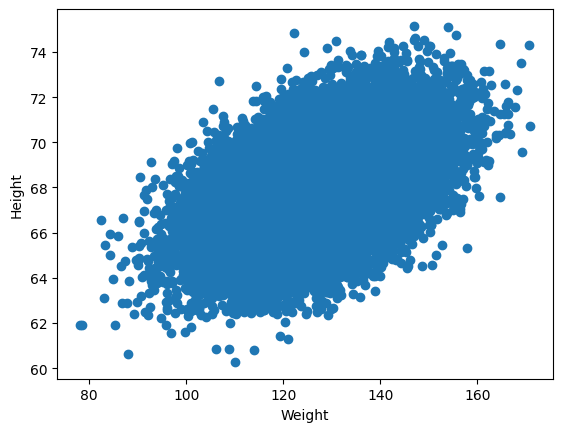

In [9]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [10]:
df.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


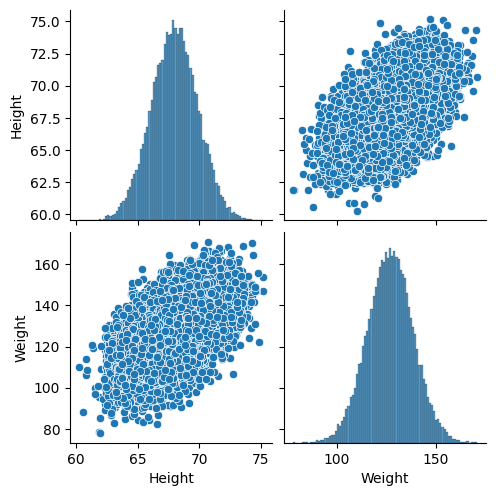

In [11]:
import seaborn as sns
sns.pairplot(df)#It creates scatter plots for every combination of two variables, allowing you to visualize how they relate to each other.

In [12]:
#Dependent and Independent features
X = df[['Weight']]#Independent feature should be dataFrame or in 2D array
y = df['Height']#This variable can be in series or 1D array
X.head()

,Weight
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971


In [13]:
#Train test split
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [15]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((18750, 1), (18750,), (6250, 1), (6250,))

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [19]:
X_test= scaler.transform(X_test)

In [20]:
#Apply Simple linear regression
from sklearn.linear_model import LinearRegression

In [21]:
regression = LinearRegression()


In [22]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
print("Coefficient or slope: " ,regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient or slope:  [0.94883892]
Intercept:  67.9938252704


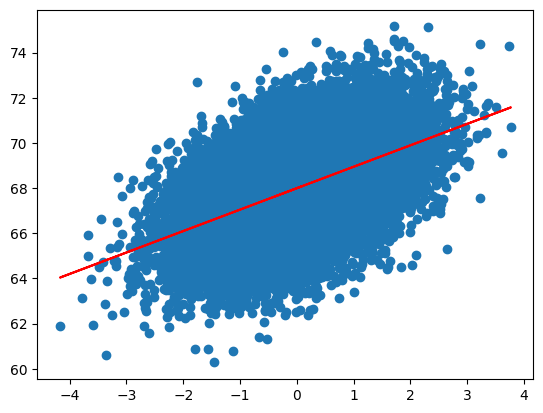

In [25]:
plt.scatter(X_train  , y_train )
plt.plot(X_train, regression.predict(X_train), color = 'red')

In [26]:
#Prediction for test Data
y_pred = regression.predict(X_test)

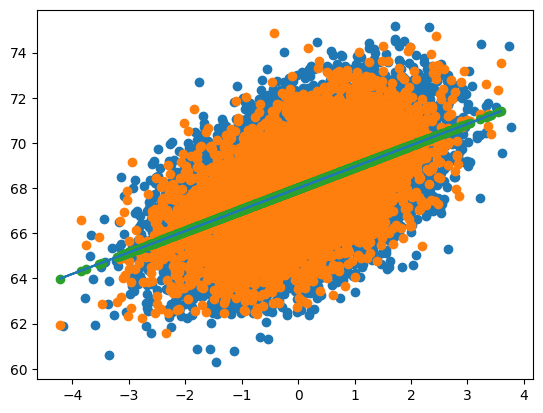

In [29]:
plt.scatter(X_train, y_train)
plt.scatter(X_test , y_test)
plt.scatter(X_test, y_pred)
plt.plot(X_test, regression.predict(X_test))

In [30]:
#Preformance Metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean square error", mse)
print("Mean absolute error", mae)
print("Root Mean square error", rmse)

Mean square error 2.7333807993730996
Mean absolute error 1.3166150322297803
Root Mean square error 1.6532939240719116


In [32]:
from sklearn.metrics import r2_score

In [33]:
score = r2_score(y_test, y_pred)
score

0.2592643941428425

In [34]:
#Adjusted R2 score
1-(1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.25914583850810224

In [35]:
##OLS technique 
import statsmodels.api as sm

In [36]:
model = sm.OLS(y_train , X_train).fit()

In [37]:
prediction = model.predict(X_test)
prediction

array([ 0.58878817, -1.2322543 ,  0.72762503, ...,  0.70158088,
       -1.10815295,  0.0023379 ])

In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.649
Date:                Sat, 14 Jun 2025   Prob (F-statistic):                      0.0561
Time:                        23:06:03   Log-Likelihood:                     -1.0572e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
#prediction for new Data
regression.predict(scaler.transform([[72]]))

c:\Users\shiva\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.50061832])

In [40]:
#Dot Product
a = np.array([[[1],[2]]])
np.random.seed(42)
np.random.random((3,2))

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452]])

In [41]:
y_pred =regression.predict(scaler.transform([[152.119]]))

c:\Users\shiva\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
y_pred

array([70.0376834])